# Basketball Player Tracking Data Exploration

### Nicholas Kalinowski

#### Sample Event


In [2]:
#load in data

import json

f = open('/Users/nicholaskalinowski/Downloads/sample.json', 'r')

data = json.loads(f.read())

In [3]:
import pandas as pd

#extract data for each team, as well as player information
hornets = pd.DataFrame(data['events'][0]['visitor']).drop('players', axis=1).head(1)
hornets_players = pd.DataFrame(data['events'][0]['visitor']['players'])

raptors = pd.DataFrame(data['events'][0]['home']).drop('players', axis=1).head(1)
raptors_players = pd.DataFrame(data['events'][0]['home']['players'])

#extract ball locations
ball = ['Ball', -1, 'ball']

teams = pd.concat([hornets, raptors])

players = pd.concat([hornets_players, raptors_players])

teams.loc[2] = ball

In [5]:
players

lastname firstname  playerid jersey position
0      Williams    Marvin    101107      2        F
1          Lamb    Jeremy    203087      3        G
2         Batum   Nicolas    201587      5      G-F
3           Lin    Jeremy    202391      7        G
4      Harrison     Aaron   1626151      9        G
5        Walker     Kemba    202689     15        G
6      Hairston        PJ    203798     19      F-G
7       Roberts     Brian    203148     22        G
8       Daniels      Troy    203584     30        G
9        Zeller      Cody    203469     40      C-F
10     Kaminsky     Frank   1626163     44        C
11   Hansbrough     Tyler    201946     50        F
12        Hawes   Spencer    201150     00      F-C
0       Johnson     James    201949      3        F
1         Scola      Luis      2449      4        F
2       Carroll   DeMarre    201960      5        F
3        Joseph      Cory    202709      6        G
4         Lowry      Kyle    200768      7        G
5       Biyombo   Bismack    202687      8      C-F
6       DeRozan     DeMar    201942     10        G
7   Valanciunas     Jonas    202685     17        C
8       Caboclo     Bruno    203998     20        F
9          Ross  Terrence    203082     31      F-G
10    Patterson   Patrick    202335     54        F
11       Wright     Delon   1626153     55        G
12     Nogueira     Lucas    203512     92        C

In [6]:
#let's look at the first event in the dataset
first_event_moments = data['events'][1]['moments']

#assign a time to each row, for each player
total_data = pd.DataFrame()
for i in range(len(first_event_moments)):
    second_data = pd.DataFrame(first_event_moments[i][5])
    second_data['time'] = i

    total_data = pd.concat([total_data, second_data])

In [7]:
#this is what the raw data output will look like
total_data.columns = ['teamid', 'playerid', 'x', 'y', 'z', 'time']

total_data

teamid  playerid         x         y        z  time
0           -1        -1  33.08382  41.39121  5.78885     0
1   1610612761      2449  33.40603  24.21082  0.00000     0
2   1610612761    201960  18.95987   5.98142  0.00000     0
3   1610612761    200768  10.77643  38.39262  0.00000     0
4   1610612761    201942  32.76517  42.28548  0.00000     0
..         ...       ...       ...       ...      ...   ...
6   1610612766    101107   6.93630  17.53227  0.00000  1149
7   1610612766    201587  13.01573  20.27790  0.00000  1149
8   1610612766    202689  20.26202  30.59392  0.00000  1149
9   1610612766    203469   7.56777  25.70641  0.00000  1149
10  1610612766    203798  12.68705  29.58115  0.00000  1149

[12650 rows x 6 columns]

In [8]:
#we created dataframes for the teams and players already. so we can merge on their respective IDs

total_data = pd.merge(total_data, teams, on='teamid', how='left')

total_data = pd.merge(total_data, players, on='playerid', how='left')


total_data

teamid  playerid         x         y        z  time  \
0              -1        -1  33.08382  41.39121  5.78885     0   
1      1610612761      2449  33.40603  24.21082  0.00000     0   
2      1610612761    201960  18.95987   5.98142  0.00000     0   
3      1610612761    200768  10.77643  38.39262  0.00000     0   
4      1610612761    201942  32.76517  42.28548  0.00000     0   
...           ...       ...       ...       ...      ...   ...   
12645  1610612766    101107   6.93630  17.53227  0.00000  1149   
12646  1610612766    201587  13.01573  20.27790  0.00000  1149   
12647  1610612766    202689  20.26202  30.59392  0.00000  1149   
12648  1610612766    203469   7.56777  25.70641  0.00000  1149   
12649  1610612766    203798  12.68705  29.58115  0.00000  1149   

                    name abbreviation  lastname firstname jersey position  
0                   Ball         ball       NaN       NaN    NaN      NaN  
1        Toronto Raptors          TOR     Scola      Luis      4        F  
2        Toronto Raptors          TOR   Carroll   DeMarre      5        F  
3        Toronto Raptors          TOR     Lowry      Kyle      7        G  
4        Toronto Raptors          TOR   DeRozan     DeMar     10        G  
...                  ...          ...       ...       ...    ...      ...  
12645  Charlotte Hornets          CHA  Williams    Marvin      2        F  
12646  Charlotte Hornets          CHA     Batum   Nicolas      5      G-F  
12647  Charlotte Hornets          CHA    Walker     Kemba     15        G  
12648  Charlotte Hornets          CHA    Zeller      Cody     40      C-F  
12649  Charlotte Hornets          CHA  Hairston        PJ     19      F-G  

[12650 rows x 12 columns]

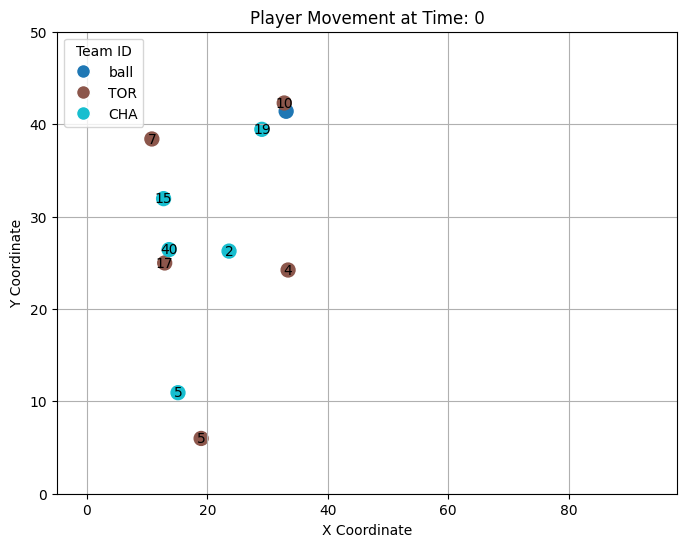

In [9]:
# Create plot animation

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

unique_teams = total_data['abbreviation'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_teams)))

#create separate colors for each team and the ball
team_color_map = {team_id: colors[i] for i, team_id in enumerate(unique_teams)}

fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    df_frame = total_data[total_data['time'] == frame]  # Filter dataframe for current time
    if not df_frame.empty:
        # Get colors based on team_id
        colors = [team_color_map[tid] for tid in df_frame['abbreviation']]
        sc = ax.scatter(df_frame['x'], df_frame['y'], s=100)
        sc.set_offsets(df_frame[['x', 'y']].values)  # Update coordinates
        sc.set_facecolor(colors)  # Update colors
        ax.set_title(f'Player Movement at Time: {frame}')

        #display the player's jersey number to each of their point values
        for x, y, jersey_num in zip(df_frame['x'], df_frame['y'], df_frame['jersey']):
            if not pd.isnull(jersey_num):
                ax.text(x, y, str(jersey_num), fontsize=10, ha='center', va='center')

    ax.set_xlim(-5, 98)  # set limits to show the enitre court
    ax.set_ylim(0, 50)

    #create legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, label=f'{team_id}', markerfacecolor=color)
                  for team_id, color in team_color_map.items()]
    ax.legend(handles=legend_handles, title='Team ID', loc='upper left')
    return sc,

#create animation
ani = animation.FuncAnimation(fig, update, frames=total_data['time'].unique(), interval=1, blit=True)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

ax.grid(True)

plt.show()


In [10]:
#save out animation
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

## Model Training

For this model, we get every event in which Kemba Walker participated in, and attempt to predict his next location iteratively based on a randomly selected five second interval. We will use an LSTM model to do so

In [1]:
import os
def get_file_paths(directory):
    """
    Get all file paths in a directory and its subdirectories.

    Args:
    - directory (str): Directory path to search.

    Returns:
    - List of file paths (str).
    """
    file_paths = []
    for root, _, files in os.walk(directory):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            file_paths.append(file_path)
    return file_paths

files = get_file_paths('./hornets_jsons/')


In [ ]:
import pandas as pd
import json
import os

def process_file(file_path):
    """
    Get all the events that Kemba Walker participated in

    Args:
    - file_path (str): Json file path to search.

    Returns:
    - Dataframe of Kemba Walker's location for each event
    """
    total_data = []
    
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        for j, event in enumerate(data['events']):
            #event_data will be a list of dataframes, one for each event
            event_data = []
            event_moments = event['moments']
            #look through the moments and find the ones that have Kemba Walker
            for k, moment in enumerate(event_moments):
                second_data = pd.DataFrame(moment[5], columns=['teamid', 'playerid', 'x', 'y', 'z'])
                second_data['time'] = k
                #Kemba's player ID is 202689. subset the data to only his locations
                kemba_data = second_data[second_data['playerid'] == 202689].copy()
                kemba_data['event'] = j
                if not kemba_data.empty:  # Check if kemba_data is not empty, if it is, don't add it to the total dataframe
                    event_data.append(kemba_data)
                
            if event_data:  # Check if event_data has any valid DataFrames, if it does not, return an informative message
                event_df = pd.concat(event_data, ignore_index=True)
                event_df['game'] = os.path.basename(file_path)
                total_data.append(event_df)
            else:
                print(f"No valid data for event {j} in file {file_path}")
                continue
    
    return total_data

# Loop through the hornets_jsons directory, which contains all the jsons for Hornets games, and extract Kemba's data
directory_path = './hornets_jsons/'
dataframes = []

for root, _, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith('.json'):
            file_data = process_file(file_path)
            dataframes.extend(file_data)
            print(f"Completed processing: {file_path}")

# Concatenate all processed data frames
final_dataframe = pd.concat(dataframes, ignore_index=True)

# Display or further process final_dataframe as needed
print(final_dataframe.head())


In [ ]:
#save to csv
final_dataframe.to_csv('kemba_data.csv')

In [4]:
#this is what the preprocessed data will look like
import pandas as pd
total_frame = pd.read_csv('kemba_data.csv').drop('Unnamed: 0', axis=1)

total_frame['event_unique'] = total_frame.groupby(['game', 'event']).ngroup() - 2618



total_frame  

teamid  playerid         x         y    z  time  event  \
0        1610612766    202689  45.15749  26.36811  0.0     0      0   
1        1610612766    202689  45.17216  26.39226  0.0     1      0   
2        1610612766    202689  45.18045  26.41611  0.0     2      0   
3        1610612766    202689  45.18991  26.43990  0.0     3      0   
4        1610612766    202689  45.19311  26.46338  0.0     4      0   
...             ...       ...       ...       ...  ...   ...    ...   
6620806  1610612766    202689  77.73130  23.53969  0.0   189    439   
6620807  1610612766    202689  77.77854  23.56587  0.0   190    439   
6620808  1610612766    202689  77.82384  23.58852  0.0   191    439   
6620809  1610612766    202689  77.86573  23.60854  0.0   192    439   
6620810  1610612766    202689  77.90552  23.62960  0.0   193    439   

                    game  event_unique  
0        0021500162.json             0  
1        0021500162.json             0  
2        0021500162.json             0  
3        0021500162.json             0  
4        0021500162.json             0  
...                  ...           ...  
6620806  0021500399.json          5205  
6620807  0021500399.json          5205  
6620808  0021500399.json          5205  
6620809  0021500399.json          5205  
6620810  0021500399.json          5205  

[6620811 rows x 9 columns]

In [5]:
#here is where Kemba went for a single event

total_frame.loc[total_frame['event_unique'] == 0]

teamid  playerid         x         y    z  time  event  \
0    1610612766    202689  45.15749  26.36811  0.0     0      0   
1    1610612766    202689  45.17216  26.39226  0.0     1      0   
2    1610612766    202689  45.18045  26.41611  0.0     2      0   
3    1610612766    202689  45.18991  26.43990  0.0     3      0   
4    1610612766    202689  45.19311  26.46338  0.0     4      0   
..          ...       ...       ...       ...  ...   ...    ...   
145  1610612766    202689  51.20668  17.68817  0.0   145      0   
146  1610612766    202689  51.22827  17.68056  0.0   146      0   
147  1610612766    202689  51.19729  17.69712  0.0   147      0   
148  1610612766    202689  51.11237  17.73184  0.0   148      0   
149  1610612766    202689  50.97322  17.78374  0.0   149      0   

                game  event_unique  
0    0021500162.json             0  
1    0021500162.json             0  
2    0021500162.json             0  
3    0021500162.json             0  
4    0021500162.json             0  
..               ...           ...  
145  0021500162.json             0  
146  0021500162.json             0  
147  0021500162.json             0  
148  0021500162.json             0  
149  0021500162.json             0  

[150 rows x 9 columns]

In [154]:
location_data = total_frame[['x', 'y', 'event_unique']]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
sequence_length = 5  # Adjust as needed


# Initialize lists to store sequences and targets
X = []
y = []

# Group data by 'event' and iterate through each event
for event_id, event_data in location_data.groupby('event_unique'):
    # Extract positions for the current event
    positions = event_data[['x', 'y']].values
    
    # Scale the data using StandardScaler
    #scaler = StandardScaler()
    #positions_scaled = scaler.fit_transform(positions)
    
    # Create sequences of length 'sequence_length' for X and y
    for i in range(len(positions) - sequence_length+5):
        #X.append(positions[i:i+sequence_length])
        next_x_sequence = positions[i:i+sequence_length]
        next_y_sequence = positions[i+sequence_length:i+sequence_length+5]
        #if there aren't five seconds to train on in the event, skip it
        if (next_x_sequence.shape == (5, 2)) and (next_y_sequence.shape == (5, 2)):
            X.append(next_x_sequence)
            y.append(next_y_sequence)
        else:
            print('skipped because X shape was ' + str(next_x_sequence.shape) + ' and y shape was ' + str(next_y_sequence.shape))


# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

skipped because X shape was (5, 2) and y shape was (4, 2)
skipped because X shape was (5, 2) and y shape was (3, 2)
skipped because X shape was (5, 2) and y shape was (2, 2)
skipped because X shape was (5, 2) and y shape was (1, 2)
skipped because X shape was (5, 2) and y shape was (0, 2)
skipped because X shape was (4, 2) and y shape was (0, 2)
skipped because X shape was (3, 2) and y shape was (0, 2)
skipped because X shape was (2, 2) and y shape was (0, 2)
skipped because X shape was (1, 2) and y shape was (0, 2)
skipped because X shape was (5, 2) and y shape was (4, 2)
skipped because X shape was (5, 2) and y shape was (3, 2)
skipped because X shape was (5, 2) and y shape was (2, 2)
skipped because X shape was (5, 2) and y shape was (1, 2)
skipped because X shape was (5, 2) and y shape was (0, 2)
skipped because X shape was (4, 2) and y shape was (0, 2)
skipped because X shape was (3, 2) and y shape was (0, 2)
skipped because X shape was (2, 2) and y shape was (0, 2)
skipped becaus

## LSTM Model

In [155]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out)
        return out
    
# Initialize the model
input_size = 2  # x_position and y_position
hidden_size = 50
output_size = 2  # Predicting x_position and y_position
num_layers = 1

model = LSTMModel(input_size, hidden_size, output_size, num_layers)
print(model)


LSTMModel(
  (lstm): LSTM(2, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=2, bias=True)
)


In [ ]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 200
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        outputs = model(inputs)
        # Calculate loss (considering the entire sequence)
        loss = criterion(outputs, targets)        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    torch.save(model.state_dict(), f'lstm_model_5seq.pt')

# Evaluation on test set
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_loss += criterion(outputs, targets).item() * inputs.size(0)

    test_loss /= len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}')

In [ ]:
# Example prediction for the next position
model.eval()
with torch.no_grad():
    # Assuming you want to predict the next position based on the first sequence in the test set
    inputs = X_test_tensor[0].unsqueeze(0)  # Add extra dimension for batch size
    inputs = inputs.to(device)
    predicted_position = model(inputs)
    
    # Convert back to original scale using inverse transform of StandardScaler if needed
    # predicted_position = scaler.inverse_transform(predicted_position.cpu().numpy())
    
    print("Predicted next position:", predicted_position)


Predicted next position: tensor([[22.3539, 14.9984]])


In [144]:
import torch

# Assuming model is already defined and trained
# Example of predicting next 50 locations after X_test_tensor[3].unsqueeze(0)

model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initial input for prediction
initial_input = X_test_tensor[3].unsqueeze(0).to(device)

predicted_locations = []

# Predict next 50 locations iteratively
with torch.no_grad():
    # Use initial input to predict the first location
    input_seq = initial_input
    for _ in range(51):
        # Predict the next location
        predicted_location = model(input_seq)
        
        # Append predicted location to results
        predicted_locations.append(predicted_location.squeeze().cpu().numpy())
        
        # Prepare input for the next prediction: slide the input sequence
        # Remove the first time step and add the predicted location as the last time step
        input_seq= torch.cat((input_seq[:, 1:, :], predicted_location.unsqueeze(1)), dim=1)

# Convert predicted locations to numpy array
predicted_locations = np.array(predicted_locations)

# Print predicted locations
print("Predicted locations:")
print(predicted_locations)

Predicted locations:
[[64.56124  32.18263 ]
 [64.52941  32.28739 ]
 [64.48975  32.4336  ]
 [64.44442  32.623966]
 [64.396095 32.85988 ]
 [64.347595 33.142784]
 [64.30168  33.475048]
 [64.26104  33.860504]
 [64.22835  34.30474 ]
 [64.20645  34.815254]
 [64.19854  35.40152 ]
 [64.20826  36.074875]
 [64.23974  36.848072]
 [64.29749  37.734325]
 [64.386246 38.745293]
 [64.511215 39.887264]
 [64.679886 41.154   ]
 [64.9062   42.51539 ]
 [65.21395  43.90767 ]
 [65.62861  45.243282]
 [66.15205  46.450027]
 [66.74494  47.501766]
 [67.34665  48.402687]
 [67.9089   49.161552]
 [68.40118  49.783863]
 [68.80526  50.277557]
 [69.116394 50.663376]
 [69.33986  50.97022 ]
 [69.48546  51.22635 ]
 [69.56389  51.453476]
 [69.58523  51.664536]
 [69.5587   51.864292]
 [69.492676 52.051453]
 [69.39464  52.221313]
 [69.27101  52.368244]
 [69.12703  52.48755 ]
 [68.96676  52.57663 ]
 [68.793274 52.635326]
 [68.60884  52.665745]
 [68.41518  52.671753]
 [68.21363  52.658398]
 [68.00517  52.631172]
 [67.79045  5

In [145]:
test = torch.cat((initial_input[0], predicted_location[0]), dim=1)

test

tensor([[[66.6230, 52.4345],
         [66.3667, 52.4210],
         [66.1002, 52.4145],
         [65.8217, 52.4139],
         [65.8217, 52.4139]]])

## Set Up Animation

In [146]:
#concatenate the test points and the predicted points

prev_pts = pd.DataFrame(X_test_tensor[3].unsqueeze(0).detach().numpy()[0])

predicted_pts = pd.DataFrame(predicted_locations)

total_pts = pd.concat([prev_pts, predicted_pts])

total_pts = total_pts.reset_index(drop=True).reset_index().rename(columns={'index': 'time', 0:'x', 1:'y'})

total_pts

total_pts['type'] = 'generated'


In [147]:
#These are the real points for the rest of the sequence, starting at the five second interval in the test set
first_x = prev_pts[0][0]
first_y = prev_pts[1][0]

first_y
test_row = total_frame.loc[(np.float32(total_frame['y']) == first_y)]

test_index = test_row.index

#total_frame.loc[total_frame['event_unique'] == test_row['event_unique']]

real_pts = total_frame.iloc[test_index[0]:test_index[0]+50].reset_index(drop=True)

In [148]:
real_pts

Unnamed: 0      teamid  playerid         x         y    z  time  event  \
0      3771492  1610612766    202689  64.71573  31.97233  0.0   374    337   
1      3771493  1610612766    202689  64.69063  32.01409  0.0   375    337   
2      3771494  1610612766    202689  64.61835  32.02302  0.0   376    337   
3      3771495  1610612766    202689  64.60133  32.06749  0.0   377    337   
4      3771496  1610612766    202689  64.58435  32.11326  0.0   378    337   
5      3771497  1610612766    202689  64.56417  32.15644  0.0   379    337   
6      3771498  1610612766    202689  64.54659  32.19551  0.0   380    337   
7      3771499  1610612766    202689  64.53004  32.23248  0.0   381    337   
8      3771500  1610612766    202689  64.52095  32.26872  0.0   382    337   
9      3771501  1610612766    202689  64.51681  32.30485  0.0   383    337   
10     3771502  1610612766    202689  64.51337  32.34209  0.0   384    337   
11     3771503  1610612766    202689  64.51533  32.37389  0.0   385    337   
12     3771504  1610612766    202689  64.52367  32.40718  0.0   386    337   
13     3771505  1610612766    202689  64.53016  32.43337  0.0   387    337   
14     3771506  1610612766    202689  64.53727  32.45854  0.0   388    337   
15     3771507  1610612766    202689  64.54332  32.48170  0.0   389    337   
16     3771508  1610612766    202689  64.54880  32.50356  0.0   390    337   
17     3771509  1610612766    202689  64.55177  32.52276  0.0   391    337   
18     3771510  1610612766    202689  64.55427  32.53872  0.0   392    337   
19     3771511  1610612766    202689  64.55762  32.55558  0.0   393    337   
20     3771512  1610612766    202689  64.55575  32.57168  0.0   394    337   
21     3771513  1610612766    202689  64.55127  32.58470  0.0   395    337   
22     3771514  1610612766    202689  64.53781  32.59263  0.0   396    337   
23     3771515  1610612766    202689  64.51422  32.59461  0.0   397    337   
24     3771516  1610612766    202689  64.50335  32.61947  0.0   398    337   
25     3771517  1610612766    202689  64.49601  32.65007  0.0   399    337   
26     3771518  1610612766    202689  64.48446  32.67496  0.0   400    337   
27     3771519  1610612766    202689  64.45985  32.68090  0.0   401    337   
28     3771520  1610612766    202689  64.40309  32.66843  0.0   402    337   
29     3771521  1610612766    202689  64.33493  32.65666  0.0   403    337   
30     3771522  1610612766    202689  64.25816  32.64269  0.0   404    337   
31     3771523  1610612766    202689  64.16872  32.63699  0.0   405    337   
32     3771524  1610612766    202689  64.06233  32.62803  0.0   406    337   
33     3771525  1610612766    202689  63.93750  32.61111  0.0   407    337   
34     3771526  1610612766    202689  63.78401  32.58190  0.0   408    337   
35     3771527  1610612766    202689  63.60995  32.55167  0.0   409    337   
36     3771528  1610612766    202689  63.41354  32.52385  0.0   410    337   
37     3771529  1610612766    202689  63.20289  32.49024  0.0   411    337   
38     3771530  1610612766    202689  62.99229  32.46958  0.0   412    337   
39     3771531  1610612766    202689  62.74785  32.42392  0.0   413    337   
40     3771532  1610612766    202689  62.47852  32.37359  0.0   414    337   
41     3771533  1610612766    202689  62.19013  32.32518  0.0   415    337   
42     3771534  1610612766    202689  61.89353  32.29389  0.0   416    337   
43     3771535  1610612766    202689  61.60066  32.27658  0.0   417    337   
44     3771536  1610612766    202689  61.29061  32.26048  0.0   418    337   
45     3771537  1610612766    202689  60.96080  32.24186  0.0   419    337   
46     3771538  1610612766    202689  60.61752  32.21106  0.0   420    337   
47     3771539  1610612766    202689  60.26888  32.17843  0.0   421    337   
48     3771540  1610612766    202689  59.91546  32.15449  0.0   422    337   
49     3771541  1610612766    202689  59.56956  32.13396  0.0   423    337   

               game  even

In [149]:

real_pts['time'] = real_pts['time'] - real_pts.loc[0, 'time']

real_pts['type'] = 'real'

real_pts = real_pts[['x', 'y', 'time', 'type']]

real_pts

x         y  time  type
0   64.71573  31.97233     0  real
1   64.69063  32.01409     1  real
2   64.61835  32.02302     2  real
3   64.60133  32.06749     3  real
4   64.58435  32.11326     4  real
5   64.56417  32.15644     5  real
6   64.54659  32.19551     6  real
7   64.53004  32.23248     7  real
8   64.52095  32.26872     8  real
9   64.51681  32.30485     9  real
10  64.51337  32.34209    10  real
11  64.51533  32.37389    11  real
12  64.52367  32.40718    12  real
13  64.53016  32.43337    13  real
14  64.53727  32.45854    14  real
15  64.54332  32.48170    15  real
16  64.54880  32.50356    16  real
17  64.55177  32.52276    17  real
18  64.55427  32.53872    18  real
19  64.55762  32.55558    19  real
20  64.55575  32.57168    20  real
21  64.55127  32.58470    21  real
22  64.53781  32.59263    22  real
23  64.51422  32.59461    23  real
24  64.50335  32.61947    24  real
25  64.49601  32.65007    25  real
26  64.48446  32.67496    26  real
27  64.45985  32.68090    27  real
28  64.40309  32.66843    28  real
29  64.33493  32.65666    29  real
30  64.25816  32.64269    30  real
31  64.16872  32.63699    31  real
32  64.06233  32.62803    32  real
33  63.93750  32.61111    33  real
34  63.78401  32.58190    34  real
35  63.60995  32.55167    35  real
36  63.41354  32.52385    36  real
37  63.20289  32.49024    37  real
38  62.99229  32.46958    38  real
39  62.74785  32.42392    39  real
40  62.47852  32.37359    40  real
41  62.19013  32.32518    41  real
42  61.89353  32.29389    42  real
43  61.60066  32.27658    43  real
44  61.29061  32.26048    44  real
45  60.96080  32.24186    45  real
46  60.61752  32.21106    46  real
47  60.26888  32.17843    47  real
48  59.91546  32.15449    48  real
49  59.56956  32.13396    49  real

In [150]:
#concatenate the generated path and the real one into one dataframe, to compare side by side
total_pts = pd.concat([total_pts, real_pts])

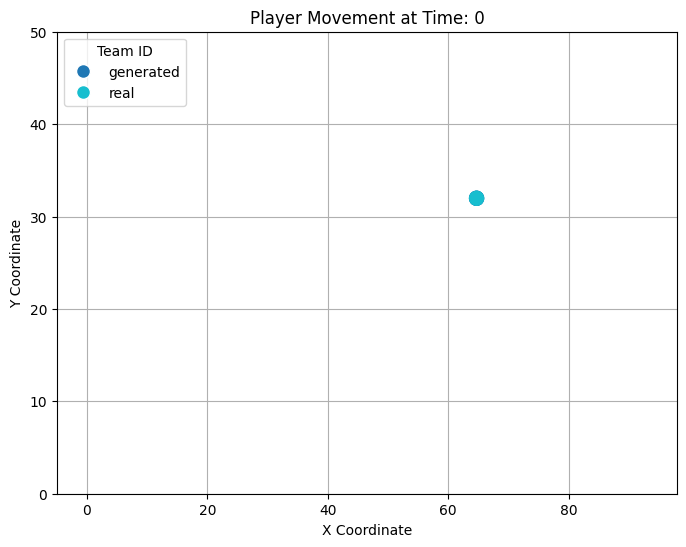

In [151]:
#Animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

unique_teams = total_pts['type'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_teams)))  # Using tab10 colormap for unique teams

team_color_map = {team_id: colors[i] for i, team_id in enumerate(unique_teams)}

fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    #ax.clear()
    df_frame = total_pts[total_pts['time'] == frame]  # Filter dataframe for current time
    sc = None
    if not df_frame.empty:
        #print(frame)
        # Get colors based on path type (generated or real)
        colors = [team_color_map[tid] for tid in df_frame['type']]
        sc = ax.scatter(df_frame['x'], df_frame['y'], s=100)
        sc.set_offsets(df_frame[['x', 'y']].values)  # Update coordinates
        sc.set_facecolor(colors)  # Update colors
        ax.set_title(f'Player Movement at Time: {frame}')

        #for x, y, jersey_num in zip(df_frame['x'], df_frame['y'], df_frame['jersey']):
        #    if not pd.isnull(jersey_num):
        #        ax.text(x, y, str(jersey_num), fontsize=10, ha='center', va='center')
    else:
        print("empty for frame " + str(frame))

    ax.set_xlim(-5, 98)  # Adjust axis limits according to court dimensions
    ax.set_ylim(0, 50)

    #create legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, label=f'{team_id}', markerfacecolor=color)
                  for team_id, color in team_color_map.items()]
    ax.legend(handles=legend_handles, title='Team ID', loc='upper left')
    return sc,

#create animation
ani = animation.FuncAnimation(fig, update, frames=total_pts['time'].unique(), interval=1, blit=True)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

ax.grid(True)

plt.show()

In [152]:
#save out file
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter3.gif', writer=writer)


## Below functions were used to create hornets_jsons folder

In [102]:
import os
import fnmatch

def list_files_with_pattern(directory, pattern):
    """
    List files in a directory that match a pattern.

    Args:
    - directory (str): Directory path to search.
    - pattern (str): Pattern to match filenames (e.g., '*.*CHA.*').

    Returns:
    - List of filenames matching the pattern.
    """
    matching_files = []
    for root, _, files in os.walk(directory):
        for filename in files:
            if fnmatch.fnmatch(filename, pattern):
                matching_files.append(os.path.join(root, filename))
    return matching_files

# Example usage:
directory_path = './NBA-Player-Movements/data'
pattern = '*.*CHA.*'
matching_files = list_files_with_pattern(directory_path, pattern)

matching_files


['./NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/11.07.2015.CHA.at.SAS.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/11.27.2015.CLE.at.CHA.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/11.10.2015.CHA.at.MIN.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/01.10.2016.CHA.at.DEN.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/12.19.2015.CHA.at.WAS.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/01.15.2016.CHA.at.NOP.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/11.13.2015.CHA.at.CHI.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/12.16.2015.CHA.at.ORL.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/12.21.2015.CHA.at.HOU.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/11.18.2015.BKN.at.CHA.7z',
 './NBA-Player-Movements/data/2016.NBA.Raw.SportVU.Game.Logs/01.20.2016.CHA.at.OKC.7z',
 './NBA-Player-Movements/data/20

In [103]:
import py7zr

def extract_7z(archive_path, extract_path):
    """
    Extracts files from a .7z archive.

    Args:
    - archive_path (str): Path to the .7z archive file.
    - extract_path (str): Directory where files will be extracted.
    """
    with py7zr.SevenZipFile(archive_path, mode='r') as archive:
        archive.extractall(path=extract_path)


for i in range(len(matching_files)):
    archive_path = matching_files[i]
    extract_path = './hornets_jsons/'
    
    extract_7z(archive_path, extract_path)
